# Power iteration

https://en.wikipedia.org/wiki/Power_iteration 



Computes the eigenvector $\overrightarrow{x}_{max}$ corresponding to the largest eigenvalue $\lambda_{max}$ of a given matrix $A$ by power iterations.

If $\overrightarrow{x}$ is an initial gues, then
$$
  \overrightarrow{x}_k = A^k x\rightarrow \overrightarrow{x}_{max}, ~\mbox{as}~k\to\infty.
$$

The eigenvalue $\lambda_{max}$ is then computed as the Rayleigh quotient:
$$
  \lambda_{k}=\frac{\overrightarrow{x}_k^TA\overrightarrow{x}_k}{\overrightarrow{x}_k^T\overrightarrow{x}_k}\rightarrow \lambda_{max},~\mbox{as}~k\to\infty.
$$

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation as ani

def plotEV(x1, x2):

    plt.figure(figsize=(4,4))


    plt.plot([0, x1[0]], [0, x1[1]], "b", zorder=100)
    plt.plot([0, x2[0]], [0, x2[1]], "r", zorder=100)

    plt.show()

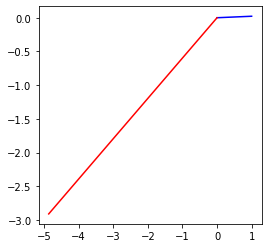

iteration:  0 , x_k =  [-0.86 -0.51]
l2 norm of Ax_k:  5.670222009115002
lambda_k =  -1.3066279857889067



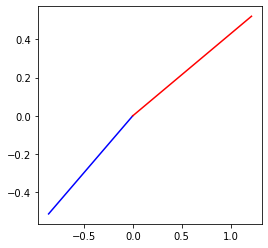

iteration:  1 , x_k =  [0.92 0.40]
l2 norm of Ax_k:  1.318206084803189
lambda_k =  -2.5038874234610446



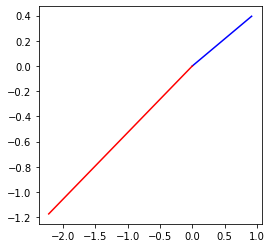

iteration:  2 , x_k =  [-0.88 -0.47]
l2 norm of Ax_k:  2.5119139109031146
lambda_k =  -1.7936614614256996



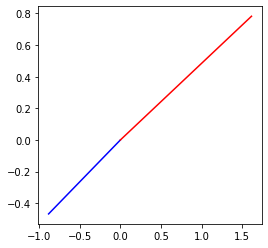

iteration:  3 , x_k =  [0.90 0.44]
l2 norm of Ax_k:  1.794788658701441
lambda_k =  -2.113637481665753



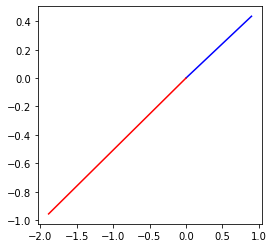

iteration:  4 , x_k =  [-0.89 -0.45]
l2 norm of Ax_k:  2.1140063022762634
lambda_k =  -1.9459059168238542



array([-0.89, -0.45])

In [ ]:
import numpy as np
from math import sqrt
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
def power_iteration(A, num_iterations: int):
    # Ideally choose a random vector
    # To decrease the chance that our vector
    # Is orthogonal to the eigenvector
    x_k = (np.random.rand(A.shape[1]) - 1/2)*10
    # b_k = np.random.normal(A.shape[1])
    x_k_norm = np.linalg.norm(x_k)
    x_k = x_k / x_k_norm

    for iteration in range(num_iterations):
        # calculate the matrix-by-vector product Ab
        
        x_k1 = np.dot(A, x_k)
        plotEV(x_k, x_k1)

        # calculate the norm
        x_k1_norm = np.linalg.norm(x_k1)

        # re normalize the vector
        # not nesessary. The code will work without this line
        # outputting the eigenvalue of the matrix with the largest absolute value and corresponding eigenvector, 
        # but the norm of eigenvector can be huge
        x_k = x_k1 / x_k1_norm

        print("iteration: ", iteration, ", x_k = ", x_k)
        print("l2 norm of Ax_k: ", x_k1_norm)
        numerator = x_k @ A @ x_k
        denominator = x_k @ x_k
        lambda_k = numerator / denominator
        print("lambda_k = ", lambda_k)
        print()
    return x_k

#power_iteration(np.array([[0.5, 0.5], [0.2, 0.8]]), 10) #not a good example. The maximal eigenvalue is 1
# power_iteration(np.array([[0, 2], [2, 3]]), 5) # the maximal eqigenvalue here should be 4
power_iteration(np.array([[-5, 6], [-3, 4]]), 5) # the eigenvalues here are -2, 1. Thus, \lambda_k should converge to -2

In the output above we can notice that the $l_2$ norms of $Ax_k$ are close to $|\lambda_k|$. In fact, this is true for any vector norm.

The absolute value of the maximal eigenvalue of $A$ can be computed as the limit of the norms of $A\overrightarrow{x}_k$, where $\overrightarrow{x}_k$ are unit vectors approximating $\overrightarrow{x}_{max}$:
$$
  \overrightarrow{x}_k: ~\|\overrightarrow{x}_k\|=1,\\
  \overrightarrow{x}_k\to\overrightarrow{x}_{max},~k\to\infty,
$$
then
$$
  \|A\overrightarrow{x}_k\|\to|\lambda_{max}|,
$$
for any vector norm $\|\cdot\|$.

Below the property is illustrated for $l_\infty$ and $l_2$ norms.

In [ ]:
# power iterations with normalization
# using the infinity norm
def normalize_infnorm(x):
  factor = np.linalg.norm(x, np.inf)
  x_n = x/ factor
  return factor, x_n

x = np.array([1, 1])
a = np.array([[0, 2], [2, 3]])
# the maximal eqigenvalue here should be 4

for i in range(8):
  x = np.dot(a, x)
  lambda_1, x = normalize_infnorm(x)
    # If we want more general formula, that works for the negative lambda, 
    # We should use the Rayleigh quotient as above. 

print("Eigenvalue:", lambda_1)
print("Eigenvector:", x, " l-infty norm of x:", np.linalg.norm(x, np.inf))

x_linf = x

Eigenvalue: 3.999949137887188
Eigenvector: [0.50 1.00]  l-infty norm of x: 1.0


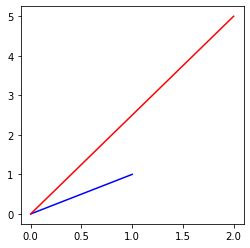

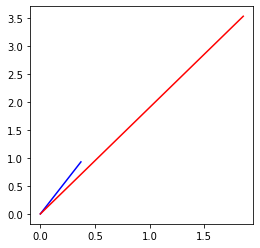

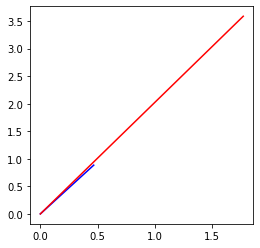

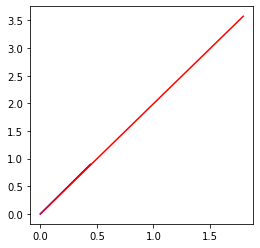

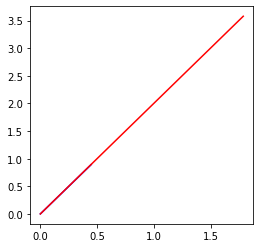

Eigenvalue: 3.9999968210897388
Eigenvector: [0.45 0.89]  l-2 norm of x: 0.9999999999999999


In [ ]:
# power iterations with normalization
# using the l2 norm
def normalize_2norm(x):
    factor = np.linalg.norm(x)
    x_n = x / factor
    return factor, x_n

x = np.array([1, 1])
a = np.array([[0, 2], [2, 3]])

for i in range(5):
    ax = np.dot(a, x)
    plotEV(x, ax)
    lambda_1, x = normalize_2norm(ax)

print("Eigenvalue:", lambda_1)
print("Eigenvector:", x, " l-2 norm of x:", np.linalg.norm(x))

x_l2 = x

In [ ]:
# check that the eigenvectors computed in the previous code are collinear
# if the result of division is a constant vector, then the coordinates are proportional, hence, the vectors are collinear
x_linf / x_l2

array([1.12, 1.12])


Stopped here

Power iteration work in case geometric multiplicity of eigenvalue is greater than one.

Below we test this fact on matrix
$$
  A=\begin{pmatrix}2&0&-1\\ 0&2&-1\\ 0&0&1 \end{pmatrix},
$$
whose eigenvalues and eigenvectors are:
$$
  \lambda_1 = \lambda_2=2, ~ \overrightarrow{v}_1 =\begin{pmatrix} 1\\ 0\\ 0\end{pmatrix}, \overrightarrow{v}_2 \begin{pmatrix} 1/\sqrt{2}\\ 1/\sqrt{2}\\0\end{pmatrix}
$$
and any linear combination thereof;
$$
  \lambda_3 = 1, ~ \overrightarrow{v}_3 =\begin{pmatrix} 1/\sqrt{3}\\ 1/\sqrt{3}\\ 1/\sqrt{3}\end{pmatrix}.
$$

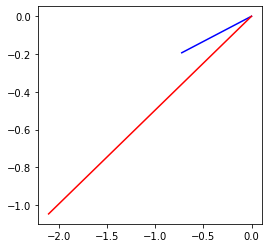

iteration:  0 , x_k =  [-0.86 -0.43 0.27]
l2 norm of Ax_k:  2.447757554238901
lambda_k =  2.275234060070808



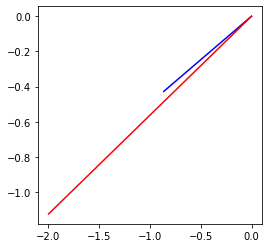

iteration:  1 , x_k =  [-0.87 -0.49 0.12]
l2 norm of Ax_k:  2.306298964187077
lambda_k =  2.1444904375628813



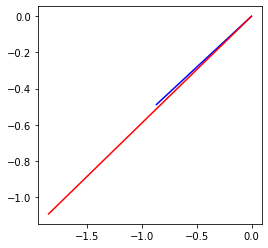

iteration:  2 , x_k =  [-0.86 -0.51 0.05]
l2 norm of Ax_k:  2.149176952609082
lambda_k =  2.0714404511144813



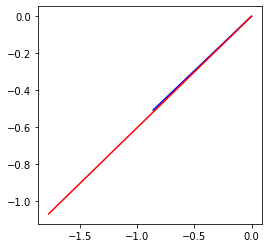

iteration:  3 , x_k =  [-0.86 -0.52 0.03]
l2 norm of Ax_k:  2.072350892159084
lambda_k =  2.035336461471572



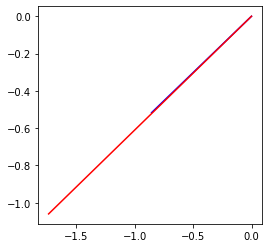

iteration:  4 , x_k =  [-0.85 -0.52 0.01]
l2 norm of Ax_k:  2.035537448892803
lambda_k =  2.017555524410895



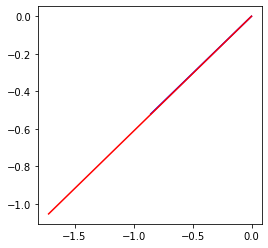

iteration:  5 , x_k =  [-0.85 -0.52 0.01]
l2 norm of Ax_k:  2.017602767638156
lambda_k =  2.0087478065407485



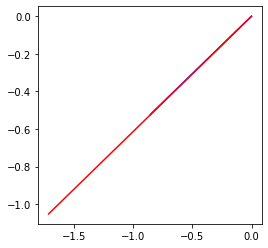

iteration:  6 , x_k =  [-0.85 -0.52 0.00]
l2 norm of Ax_k:  2.008759260636659
lambda_k =  2.004366210007579



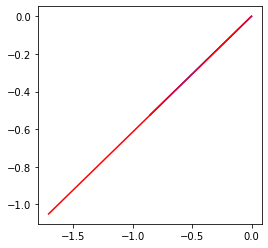

iteration:  7 , x_k =  [-0.85 -0.52 0.00]
l2 norm of Ax_k:  2.004369030068656
lambda_k =  2.0021811572206074



array([-0.85, -0.52, 0.00])

In [ ]:
A = np.array([[2, 0, -1], [0, 2, -1], [0, 0, 1]])
power_iteration(A, 8)

In case matrix $A$ has eigenvalues $\lambda_1, \lambda_2$ of equal absolute value but opposite sign: $\lambda_1=-\lambda_2$, the power iteration algorithm might fail.

Below we try to find numerically the eigenvalues and eigenvectors of matrix
$$
  A=\begin{pmatrix} 1& -2\\ 0& -1 \end{pmatrix},
$$
whose true eigenvalues are
$$
  \begin{matrix}\lambda_1 = 1, & \overrightarrow{v}_1 =\begin{pmatrix} 1\\ 0\end{pmatrix} ;\\
  \lambda_2 = -1, & \overrightarrow{v}_2 =\begin{pmatrix} 1/\sqrt{2}\\ 1/\sqrt{2}\end{pmatrix}.
  \end{matrix}
$$

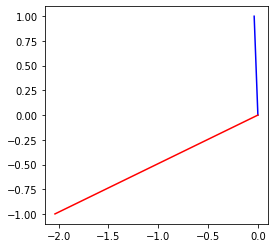

iteration:  0 , x_k =  [-0.90 -0.44]
l2 norm of Ax_k:  2.267867033961491
lambda_k =  -0.17943025308077276



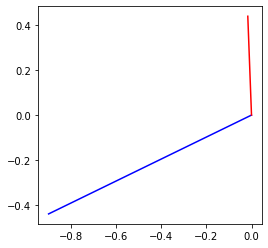

iteration:  1 , x_k =  [-0.04 1.00]
l2 norm of Ax_k:  0.4409429587471045
lambda_k =  -0.9228494248178623



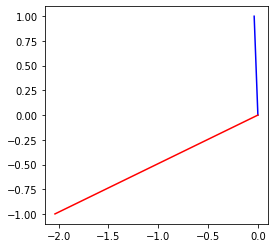

iteration:  2 , x_k =  [-0.90 -0.44]
l2 norm of Ax_k:  2.2678670339614913
lambda_k =  -0.17943025308077276



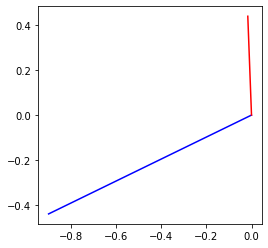

iteration:  3 , x_k =  [-0.04 1.00]
l2 norm of Ax_k:  0.4409429587471045
lambda_k =  -0.9228494248178623



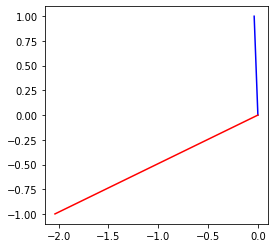

iteration:  4 , x_k =  [-0.90 -0.44]
l2 norm of Ax_k:  2.2678670339614913
lambda_k =  -0.17943025308077276



array([-0.90, -0.44])

In [ ]:
A = np.array([[1, -2], [0, -1]])
power_iteration(A, 5)

Lets now experiment with the case, when our initial gues $x$ is orthogonal to the eigenspace, corresponding to the maximal absolute value of the matrix.

Consider matrix
$$
  A=\begin{pmatrix}2&0\\ 0&1 \end{pmatrix},
$$
whose eigenvalues and eigenvectors are:
$$
  \lambda_1 = 2, ~ \overrightarrow{v}_1 =\begin{pmatrix} 1\\ 0\end{pmatrix};
$$
$$
  \lambda_2 = 1, ~ \overrightarrow{v}_2 =\begin{pmatrix} 0\\ 1\end{pmatrix}.
$$

Let us deliberately take the initial guess
$$
  x=\begin{pmatrix}0\\10 \end{pmatrix}.
$$
The guess is that the process will converge to the eigenvalue $\lambda_2 =1$ and its eigenvector.

In [ ]:
def normalize_infnorm(x):
  factor = np.linalg.norm(x, np.inf)
  x_n = x / factor
  return factor, x_n

a = np.array([[2, 0], [0, 1]])
x = np.array([0, 3])

for i in range(5):
  x = np.dot(a, x)
  print("iteration: ", i, ", x_k = ", x)
  lambda_1, x = normalize_infnorm(x)
  print("lambda_k = ", lambda_1)

iteration:  0 , x_k =  [0 3]
lambda_k =  3.0
iteration:  1 , x_k =  [0.00 1.00]
lambda_k =  1.0
iteration:  2 , x_k =  [0.00 1.00]
lambda_k =  1.0
iteration:  3 , x_k =  [0.00 1.00]
lambda_k =  1.0
iteration:  4 , x_k =  [0.00 1.00]
lambda_k =  1.0


# Inverse power iteration
Returns the inverse of the minimal (in absolute value) eigenvalue of the given matrix.

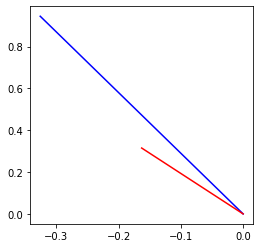

iteration:  0 , x_k =  [-0.46 0.89]
l2 norm of Ax_k:  0.3547906907990497
lambda_k =  0.36852337486402703



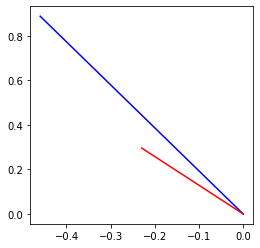

iteration:  1 , x_k =  [-0.61 0.79]
l2 norm of Ax_k:  0.3747481096950624
lambda_k =  0.39597753606026087



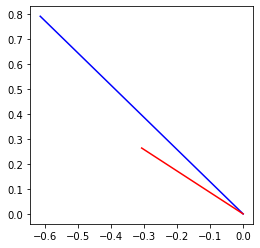

iteration:  2 , x_k =  [-0.76 0.65]
l2 norm of Ax_k:  0.40412202783757123
lambda_k =  0.4292283078078545



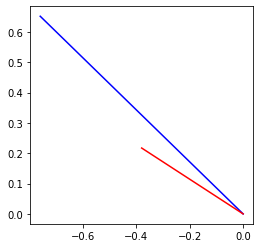

iteration:  3 , x_k =  [-0.87 0.50]
l2 norm of Ax_k:  0.4370624553080243
lambda_k =  0.45883481531640014



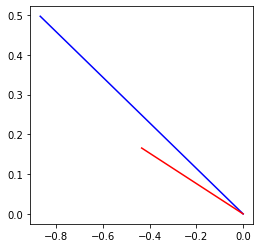

iteration:  4 , x_k =  [-0.93 0.36]
l2 norm of Ax_k:  0.46443048934187503
lambda_k =  0.478794617391647



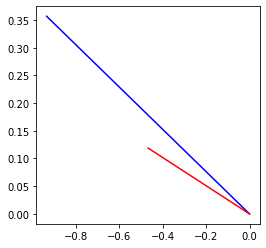

iteration:  5 , x_k =  [-0.97 0.25]
l2 norm of Ax_k:  0.482005028839298
lambda_k =  0.48985854040428434



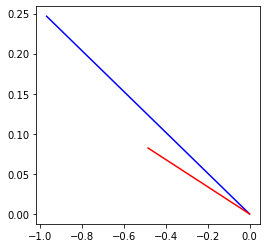

iteration:  6 , x_k =  [-0.99 0.17]
l2 norm of Ax_k:  0.49147612726381423
lambda_k =  0.495334984400059



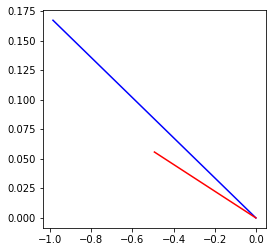

iteration:  7 , x_k =  [-0.99 0.11]
l2 norm of Ax_k:  0.49609725558608897
lambda_k =  0.4978939099231483



array([-0.99, 0.11])

In [ ]:
# A = np.array([[-5, 6], [-3, 4]]) # the eigenvalues here are -2, 1. The output should be close to 1
A = np.array([[2, 0], [0, 3]]) # the eigenvalues here are 2, 3. The output should be close to 0.5
Ainv = np.linalg.inv(A)
power_iteration(Ainv, 8)

In [ ]:
def normalize_infnorm(x):
  factor = np.linalg.norm(x, np.inf)
  x_n = x / factor
  return factor, x_n

a = np.array([[7, 4], [-8, -5]])
x = np.array([0, 1])

for i in range(5):
  x = np.dot(a, x)
  print("iteration: ", i, ", x_k = ", x)
  lambda_1 = (x.T @ a @ x) / (x.T @ x)
  print("lambda_k = ", lambda_1)

iteration:  0 , x_k =  [ 4 -5]
lambda_k =  1.6341463414634145
iteration:  1 , x_k =  [ 8 -7]
lambda_k =  3.7787610619469025
iteration:  2 , x_k =  [ 28 -29]
lambda_k =  2.788307692307692
iteration:  3 , x_k =  [ 80 -79]
lambda_k =  3.0753104975872163
iteration:  4 , x_k =  [ 244 -245]
lambda_k =  2.975443497461547
